### Полянчиков Владислав АБД19-1м


##### 1.Воспроизведите код из лекционного примера для "временного ряда"

In [ ]:
import numpy as np
np.random.seed(42)
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation, Dropout
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
def show_shapes(): # can make yours to take inputs; this'll use local variable values
    print("Expected: (num_samples, timesteps, channels)")
    print("Sequences: {}".format(Sequences.shape))
    print("Targets:   {}".format(Targets.shape)) 

In [ ]:
N = 1000
Tp = 800
t= np.arange(0, N)
x= np.sin(0.02*t)++ np.random.rand(N)
df = pd.DataFrame(x)

In [ ]:
values=df.values
train,test = values [0:Tp,:], values[Tp:N]

In [ ]:
step = 4
test = np.append(test,np.repeat(test [-1,], step))
train = np.append(train,np.repeat(train [-1,], step))

def convertToMatrix(data , step):
  X, Y =[], []
  for i in range(len(data) - step):
    d= i+step
    X.append(data[i:d, ])
    Y.append(data[d,])
  return np.array(X), np.array(Y)

trainX,trainY =convertToMatrix(train,step)
testX,testY = convertToMatrix(test,step)

In [ ]:
trainX = np.reshape(trainX , (trainX.shape[0], 1, trainX.shape[1]))

testX = np.reshape(testX , (testX.shape[0], 1, testX.shape[1]))

In [ ]:
trainX.shape

(800, 1, 4)

In [ ]:
testX[0].reshape(1, 1, 4).shape

(1, 1, 4)

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1, step), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 32)                1184      
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(trainX, trainY, epochs=150, verbose=2)

Epoch 1/150
25/25 - 0s - loss: 0.2783
Epoch 2/150
25/25 - 0s - loss: 0.1210
Epoch 3/150
25/25 - 0s - loss: 0.1128
Epoch 4/150
25/25 - 0s - loss: 0.1094
Epoch 5/150
25/25 - 0s - loss: 0.1070
Epoch 6/150
25/25 - 0s - loss: 0.1063
Epoch 7/150
25/25 - 0s - loss: 0.1045
Epoch 8/150
25/25 - 0s - loss: 0.1040
Epoch 9/150
25/25 - 0s - loss: 0.1038
Epoch 10/150
25/25 - 0s - loss: 0.1038
Epoch 11/150
25/25 - 0s - loss: 0.1031
Epoch 12/150
25/25 - 0s - loss: 0.1034
Epoch 13/150
25/25 - 0s - loss: 0.1027
Epoch 14/150
25/25 - 0s - loss: 0.1022
Epoch 15/150
25/25 - 0s - loss: 0.1014
Epoch 16/150
25/25 - 0s - loss: 0.1021
Epoch 17/150
25/25 - 0s - loss: 0.1017
Epoch 18/150
25/25 - 0s - loss: 0.1014
Epoch 19/150
25/25 - 0s - loss: 0.1018
Epoch 20/150
25/25 - 0s - loss: 0.1016
Epoch 21/150
25/25 - 0s - loss: 0.1012
Epoch 22/150
25/25 - 0s - loss: 0.1010
Epoch 23/150
25/25 - 0s - loss: 0.1007
Epoch 24/150
25/25 - 0s - loss: 0.1010
Epoch 25/150
25/25 - 0s - loss: 0.1014
Epoch 26/150
25/25 - 0s - loss: 0.

In [ ]:
trainPredict = model.predict(trainX)

In [ ]:
testPredict = []
for i in range(len(testX)):
  testPredict.append(model.predict(testX[i].reshape(1, 1, 4)))

testPredict = np.array(testPredict).reshape(len(testX), 1)
predicted = np.concatenate((trainPredict, testPredict), axis=0)

0.09125137329101562


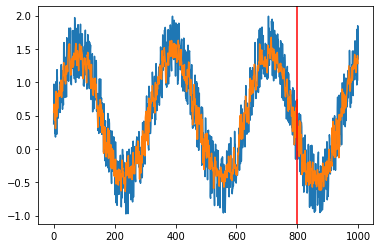

In [ ]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)
index = df.index.values
plt.plot(index, df)
plt.plot(index, predicted)
plt.axvline(df.index[Tp], c='r')
plt.show()

##### 2. Возьмите наблюдения за курсом каких либо акций и предскажите стоимость акции на день вперед с помощью простой RNN

In [ ]:
import yfinance as yf

#define the ticker symbol
tickerSymbol = 'AAPL'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2020-1-25')

#see your data
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04,6.59,6.62,6.55,6.60,493729600,0.0,0.0
2010-01-05,6.62,6.65,6.58,6.62,601904800,0.0,0.0
2010-01-06,6.62,6.64,6.50,6.51,552160000,0.0,0.0
2010-01-07,6.54,6.54,6.45,6.50,477131200,0.0,0.0
2010-01-08,6.49,6.54,6.45,6.54,447610800,0.0,0.0
...,...,...,...,...,...,...,...
2020-01-17,78.53,79.14,78.21,79.14,137816400,0.0,0.0
2020-01-21,78.75,79.21,78.46,78.60,110843200,0.0,0.0
2020-01-22,79.10,79.45,78.78,78.88,101832400,0.0,0.0


In [ ]:
tickerDf['Dividends'].value_counts()

0.00000    2502
0.14250       4
0.11750       4
0.10893       4
0.13000       4
0.18250       4
0.15750       4
0.19250       3
0.09464       3
Name: Dividends, dtype: int64

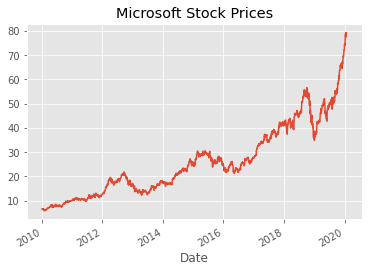

In [ ]:
tickerDf['Close'].plot(title = 'Microsoft Stock Prices');

In [ ]:
tdf = tickerDf.reset_index()
tdf['Close5'] = '-'

In [ ]:
step = 5

In [ ]:
for i in range(len(tdf)):
  try:
    tdf.loc[i, 'Close5'] = tdf.loc[i+step, 'Close']
  except KeyError:
    pass

In [ ]:
tdf = tdf[:-step]

In [ ]:
tdf

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close5
0,2010-01-04,6.59,6.62,6.55,6.60,493729600,0.0,0.0,6.48
1,2010-01-05,6.62,6.65,6.58,6.62,601904800,0.0,0.0,6.41
2,2010-01-06,6.62,6.64,6.50,6.51,552160000,0.0,0.0,6.5
3,2010-01-07,6.54,6.54,6.45,6.50,477131200,0.0,0.0,6.46
4,2010-01-08,6.49,6.54,6.45,6.54,447610800,0.0,0.0,6.36
...,...,...,...,...,...,...,...,...,...
2522,2020-01-10,77.12,77.63,76.53,77.05,140644800,0.0,0.0,79.14
2523,2020-01-13,77.38,78.72,77.25,78.70,121532000,0.0,0.0,78.6
2524,2020-01-14,78.63,78.85,77.51,77.63,161954400,0.0,0.0,78.88
2525,2020-01-15,77.43,78.33,76.86,77.30,121923600,0.0,0.0,79.26


In [ ]:
tdf['Close5'] = tdf['Close5'].astype(np.float64)

In [ ]:
tdf.corr()['Close5']

Open            0.997451
High            0.997553
Low             0.997598
Close           0.997681
Volume         -0.625929
Dividends       0.053614
Stock Splits   -0.007199
Close5          1.000000
Name: Close5, dtype: float64

In [ ]:
tdf2 = tdf.drop(['Dividends', 'Stock Splits'], axis=1)
tdf2['Volume'] = tdf2['Volume'] / 10**7

In [ ]:
X = tdf2.drop('Close5', axis=1)
y = tdf2['Close5']

In [ ]:
year = 365
index = tdf2.Date
X.drop('Date', axis=1, inplace=True)
X_train = np.asarray(X[:-year]).astype(np.float32)
X_test = np.asarray(X[-year:]).astype(np.float32)
y_train = np.asarray(y[:-year]).astype(np.float32)
y_test = np.asarray(y[-year:]).astype(np.float32)

In [ ]:
#X_train = np.reshape(X_train , (X_train.shape[0], 1, X_train.shape[1]))

#X_test = np.reshape(X_test , (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)
y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

In [ ]:
X_train.shape

(2162, 1, 5)

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1, X_train.shape[2]), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='nadam', metrics='mean_absolute_error')
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_21 (SimpleRNN)    (None, 32)                1216      
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 9         
Total params: 1,489
Trainable params: 1,489
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, batch_size = 40, epochs=300, verbose=2)

Epoch 1/300
55/55 - 0s - loss: 495.1991 - mean_absolute_error: 20.0187
Epoch 2/300
55/55 - 0s - loss: 194.6877 - mean_absolute_error: 11.6573
Epoch 3/300
55/55 - 0s - loss: 19.4854 - mean_absolute_error: 3.2989
Epoch 4/300
55/55 - 0s - loss: 4.7548 - mean_absolute_error: 1.3628
Epoch 5/300
55/55 - 0s - loss: 2.0182 - mean_absolute_error: 0.8882
Epoch 6/300
55/55 - 0s - loss: 1.3933 - mean_absolute_error: 0.8008
Epoch 7/300
55/55 - 0s - loss: 1.1813 - mean_absolute_error: 0.7602
Epoch 8/300
55/55 - 0s - loss: 1.0548 - mean_absolute_error: 0.7288
Epoch 9/300
55/55 - 0s - loss: 0.9583 - mean_absolute_error: 0.6960
Epoch 10/300
55/55 - 0s - loss: 0.8943 - mean_absolute_error: 0.6767
Epoch 11/300
55/55 - 0s - loss: 0.8506 - mean_absolute_error: 0.6567
Epoch 12/300
55/55 - 0s - loss: 0.8103 - mean_absolute_error: 0.6472
Epoch 13/300
55/55 - 0s - loss: 0.7878 - mean_absolute_error: 0.6369
Epoch 14/300
55/55 - 0s - loss: 0.7660 - mean_absolute_error: 0.6302
Epoch 15/300
55/55 - 0s - loss: 0.75

In [ ]:
np.random.seed(42)

In [ ]:
trainPredict = model.predict(X_train)

In [ ]:
X_train.shape

(2162, 1, 5)

In [ ]:
testPredict = []
for i in range(len(X_test)):
  testPredict.append(model.predict(X_test[i].reshape(1, 1, X_train.shape[2])))

testPredict = np.array(testPredict).reshape(len(X_test), 1)
#predicted = np.concatenate((trainPredict, testPredict), axis=0)
predicted = np.concatenate((y_train.reshape(X_train.shape[0], 1), testPredict), axis=0)

[0.6566697955131531, 0.5778226852416992]


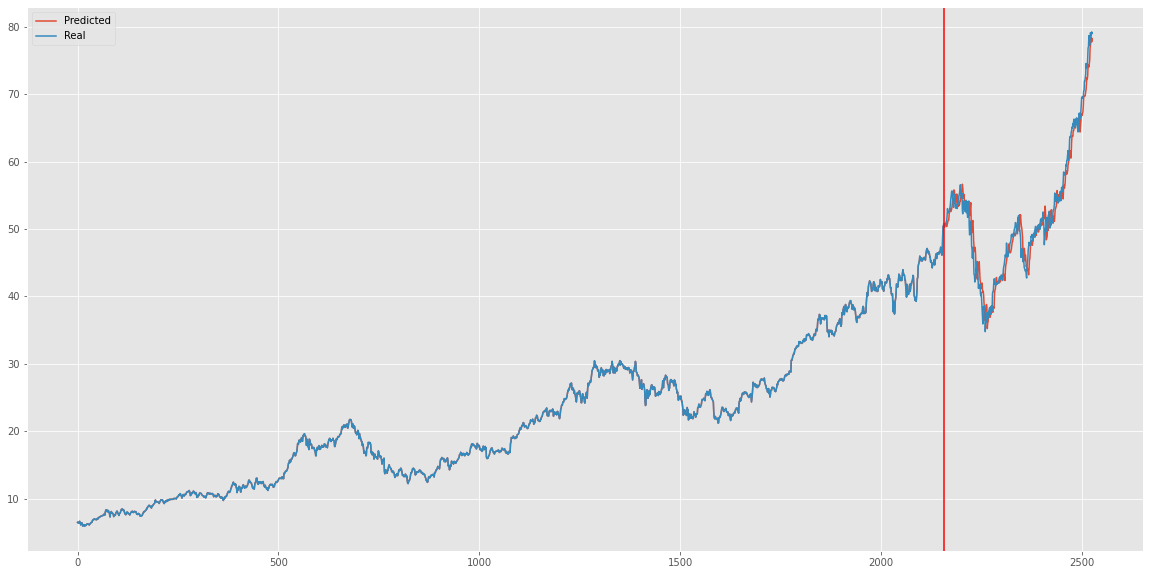

In [ ]:
#step = 5
trainScore = model.evaluate(X_train, y_train, verbose=0)
print(trainScore)

plt.figure(figsize=(20,10))
plt.plot(predicted, label = 'Predicted')
plt.plot(tdf.Close5, label= 'Real')
plt.axvline(2527-365-step, c='r')
plt.legend()
plt.show()

[3.1800880432128906, 1.330317735671997]


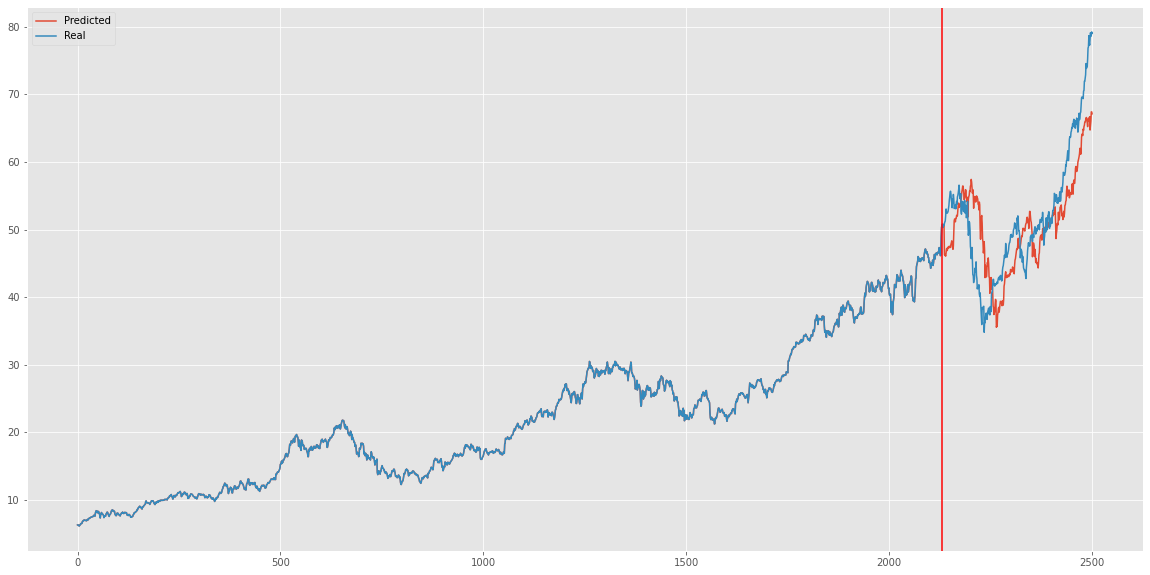

In [ ]:
#step = 30
trainScore = model.evaluate(X_train, y_train, verbose=0)
print(trainScore)

plt.figure(figsize=(20,10))
plt.plot(predicted, label = 'Predicted')
plt.plot(tdf.Close5, label= 'Real')
plt.axvline(2527-365-step, c='r')
plt.legend()
plt.show()

[734.9901733398438, 26.44343376159668]


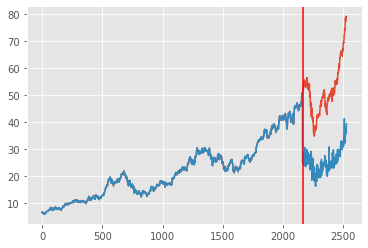

In [ ]:
# без удаления stock splits и dividends и без деления Volume

trainScore = model.evaluate(X_test, y_test, verbose=0)
print(trainScore)


plt.plot(predicted)
plt.plot(tdf.Close5)
plt.axvline(2527-365, c='r')
plt.show()

#### Воспроизведите RNN для анализа бинарной тональности коротких выражений на русском языке. Для базы данных каждый предлагает по 10 экземпляров для обучающего и тестового словарей, обмен данными через облако.

In [34]:
import nltk
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

def extract_features(words):
    return dict([(word, True) for word in words])

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [35]:
import numpy as np
np.random.seed(42)
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation, Dropout
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [73]:
train_data = {'я хороший': True,
              'это очень хорошо': True, 
              'это нехорошо': False, 
              'это неплохо': True, 
              'я плохой': False, 
              'это хорошо': True,
              'это печально': False,
              'я счастлив': True,
              'это не радостно': False, 
              'это не печально': True, 
              'это плохо': False, 
              'я очень счастлив': True, 
              'я очень печальный': False}

test_data =  {'плохой': False, 
              'не хорошо': True,
              'это печально': False,
              'я счастлив': True}

In [74]:
# Создание словаря
vocab = list(set([w for text in train_data.keys () for w in text.split(' ')]))
vocab_size = len(vocab)
print('%d unique words found ' % vocab_size)

14 unique words found 


In [75]:
# Назначить индекс каждому слову
word_to_idx = { w: i for i, w in enumerate(vocab) }
idx_to_word = { i: w for i, w in enumerate(vocab) }
 
print(word_to_idx['хороший']) # 16 (это может измениться)
print(idx_to_word[0]) # грустно (это может измениться)

5
очень


In [76]:
import numpy as np
 
 
def createInputs(text):
    '''
    Возвращает массив унитарных векторов
    которые представляют слова в введенной строке текста
    - текст является строкой string
    - унитарный вектор имеет форму (vocab_size, 1)
    '''
    
    inputs = []
    for w in text.split(' '):
        v = np.zeros((vocab_size, 1))
        v[word_to_idx[w]] = 1
        inputs.append(v)
    
    return inputs

In [77]:
import numpy as np
from numpy.random import randn
 
 
class RNN:
    # Классическая рекуррентная нейронная сеть
    
    def __init__(self, input_size, output_size, hidden_size=64):
        # Вес
        self.Whh = randn(hidden_size, hidden_size) / 1000
        self.Wxh = randn(hidden_size, input_size) / 1000
        self.Why = randn(output_size, hidden_size) / 1000
        
        # Смещения
        self.bh = np.zeros((hidden_size, 1))
        self.by = np.zeros((output_size, 1))

    def forward(self, inputs):
        '''
        Выполнение передачи нейронной сети при помощи входных данных
        Возвращение результатов вывода и скрытого состояния
        Вывод - это массив одного унитарного вектора с формой (input_size, 1)
        '''
        
        h = np.zeros((self.Whh.shape[0], 1))
 
        self.last_inputs = inputs
        self.last_hs = { 0: h }
 
        # Выполнение каждого шага нейронной сети RNN
        for i, x in enumerate(inputs):
            h = np.tanh(self.Wxh @ x + self.Whh @ h + self.bh)
            self.last_hs[i + 1] = h
 
        # Подсчет вывода
        y = self.Why @ h + self.by
 
        return y, h
    
    def backprop(self, d_y, learn_rate=2e-2):
        '''
        Выполнение фазы обратного распространения нейронной сети RNN.
        - d_y (dL/dy) имеет форму (output_size, 1).
        - learn_rate является вещественным числом float.
        '''
        '''
        Выполнение фазы обратного распространения RNN.
        - d_y (dL/dy) имеет форму (output_size, 1).
        - learn_rate является вещественным числом float.
        '''
        n = len(self.last_inputs)
 
        # Вычисление dL/dWhy и dL/dby.
        d_Why = d_y @ self.last_hs[n].T
        d_by = d_y
 
        # Инициализация dL/dWhh, dL/dWxh, и dL/dbh к нулю.
        d_Whh = np.zeros(self.Whh.shape)
        d_Wxh = np.zeros(self.Wxh.shape)
        d_bh = np.zeros(self.bh.shape)
 
        # Вычисление dL/dh для последнего h.
        d_h = self.Why.T @ d_y
 
        # Обратное распространение во времени.
        for t in reversed(range(n)):
            # Среднее значение: dL/dh * (1 - h^2)
            temp = ((1 - self.last_hs[t + 1] ** 2) * d_h)
 
            # dL/db = dL/dh * (1 - h^2)
            d_bh += temp
 
            # dL/dWhh = dL/dh * (1 - h^2) * h_{t-1}
            d_Whh += temp @ self.last_hs[t].T
 
            # dL/dWxh = dL/dh * (1 - h^2) * x
            d_Wxh += temp @ self.last_inputs[t].T
 
            # Далее dL/dh = dL/dh * (1 - h^2) * Whh
            d_h = self.Whh @ temp
 
        # Отсекаем, чтобы предотвратить разрыв градиентов.
        for d in [d_Wxh, d_Whh, d_Why, d_bh, d_by]:
            np.clip(d, -1, 1, out=d)
 
        # Обновляем вес и смещение с использованием градиентного спуска.
        self.Whh -= learn_rate * d_Whh
        self.Wxh -= learn_rate * d_Wxh
        self.Why -= learn_rate * d_Why
        self.bh -= learn_rate * d_bh
        self.by -= learn_rate * d_by 

In [78]:
def softmax(xs):
    # Применение функции Softmax для входного массива
    return np.exp(xs) / sum(np.exp(xs))
 
 
# Инициализация нашей рекуррентной нейронной сети RNN
rnn = RNN(vocab_size, 2)
 
 
inputs = createInputs('я очень хороший')
out, h = rnn.forward(inputs)
probs = softmax(out)
print(probs) # [[0.50000095], [0.49999905]]

[[0.5000041]
 [0.4999959]]


In [79]:
# Цикл для каждого примера тренировки
for x, y in train_data.items():
    inputs = createInputs(x)
    target = int(y)
 
    # Прямое распространение
    out, _ = rnn.forward(inputs)
    probs = softmax(out)
 
    # Создание dL/dy
    d_L_d_y = probs
    d_L_d_y[target] -= 1
 
    # Обратное распространение
    rnn.backprop(d_L_d_y)

In [80]:
import random
 
 
def processData(data, backprop=True):
    '''
    Возврат потери рекуррентной нейронной сети и точности для данных
    - данные представлены как словарь, что отображает текст как True или False.
    - backprop определяет, нужно ли использовать обратное распределение
    '''
    items = list(data.items())
    random.shuffle(items)
 
    loss = 0
    num_correct = 0
 
    for x, y in items:
        inputs = createInputs(x)
        target = int(y)
 
        # Прямое распределение
        out, _ = rnn.forward(inputs)
        probs = softmax(out)
 
        # Вычисление потери / точности 
        loss -= np.log(probs[target])
        num_correct += int(np.argmax(probs) == target)
 
        if backprop:
            # Создание dL/dy
            d_L_d_y = probs
            d_L_d_y[target] -= 1
 
            # Обратное распределение
            rnn.backprop(d_L_d_y)
 
    return loss / len(data), num_correct / len(data)

In [81]:
# Цикл тренировки
for epoch in range(1000):
    train_loss, train_acc = processData(train_data)
 
    if epoch % 100 == 99:
        print('--- Epoch %d' % (epoch + 1))
        print('Train:\tLoss %.3f | Accuracy: %.3f' % (train_loss, train_acc))
 
        test_loss, test_acc = processData(test_data, backprop=False)
        print('Test:\tLoss %.3f | Accuracy: %.3f' % (test_loss, test_acc))

--- Epoch 100
Train:	Loss 0.563 | Accuracy: 0.923
Test:	Loss 0.546 | Accuracy: 0.750
--- Epoch 200
Train:	Loss 0.051 | Accuracy: 1.000
Test:	Loss 0.049 | Accuracy: 1.000
--- Epoch 300
Train:	Loss 0.012 | Accuracy: 1.000
Test:	Loss 0.011 | Accuracy: 1.000
--- Epoch 400
Train:	Loss 0.006 | Accuracy: 1.000
Test:	Loss 0.006 | Accuracy: 1.000
--- Epoch 500
Train:	Loss 0.004 | Accuracy: 1.000
Test:	Loss 0.004 | Accuracy: 1.000
--- Epoch 600
Train:	Loss 0.003 | Accuracy: 1.000
Test:	Loss 0.003 | Accuracy: 1.000
--- Epoch 700
Train:	Loss 0.002 | Accuracy: 1.000
Test:	Loss 0.002 | Accuracy: 1.000
--- Epoch 800
Train:	Loss 0.002 | Accuracy: 1.000
Test:	Loss 0.002 | Accuracy: 1.000
--- Epoch 900
Train:	Loss 0.002 | Accuracy: 1.000
Test:	Loss 0.001 | Accuracy: 1.000
--- Epoch 1000
Train:	Loss 0.001 | Accuracy: 1.000
Test:	Loss 0.001 | Accuracy: 1.000


##### 4. Воспроизведите простую RNN для генерации текста

In [ ]:
text = 'КАК СОШЛИСЬ ЖЕСТОКАЯ СТЕРВА И ЭГОИСТИЧНЫЙ УБЛЮДОК. Она была жестокой стервой; а он эгоистичным ублюдком. Они буквально врезались друг в друга однажды вечером в пабе Грассмаркет. Они смутно припомнили, что их кто-то когда-то знакомил, но не могли вспомнить никаких подробностей. По крайней мере, именно это они сказали самим себе и друг другу. Она за словом в карман не лезла и вела себя крайне оскорбительно, но он не обращал на это внимания, так как был безразличен ко всему, за исключением восьмидесяти шиллингов (восемьдесят шиллингов — так в Шотландии называют крепкое темное пиво — прим.перев.), которое опрокидывал пинту за пинтой. Они решили пойти в ее квартиру перепихнуться. У него своей квартиры не было; сидя на полном обеспечении у родителей, он считал бессмысленным обзаводиться ею. Сидя на кровати, она наблюдала, как он раздевается. Ее лицо помрачнело, когда он снял с себя свои пурпурные боксерские трусы. — Кого ты рассчитываешь удовлетворить этим? — сердито спросила она, бросив на него презрительный взгляд. — Себя, — ответил он, ложась на кровать рядом с ней. После самого процесса, она злобно поносила его выступление с таким ядовитым сарказмом, которое разорвало бы хрупкое сексуальное эго большинства мужчин в клочки. Он едва ли слышал хотя бы слово из тех, что она сказала. Его последние мысли, когда он проваливался в пьяный сон, были связаны с завтраком. Он надеялся, что у нее довольно много съестного и она приготовит утром хорошее жарево. Спустя несколько недель они уже жили вместе. Люди говорили, что они прекрасно ладят друг с другом.'

In [ ]:
text = text.lower()

In [ ]:
text

'как сошлись жестокая стерва и эгоистичный ублюдок. она была жестокой стервой; а он эгоистичным ублюдком. они буквально врезались друг в друга однажды вечером в пабе грассмаркет. они смутно припомнили, что их кто-то когда-то знакомил, но не могли вспомнить никаких подробностей. по крайней мере, именно это они сказали самим себе и друг другу. она за словом в карман не лезла и вела себя крайне оскорбительно, но он не обращал на это внимания, так как был безразличен ко всему, за исключением восьмидесяти шиллингов (восемьдесят шиллингов — так в шотландии называют крепкое темное пиво — прим.перев.), которое опрокидывал пинту за пинтой. они решили пойти в ее квартиру перепихнуться. у него своей квартиры не было; сидя на полном обеспечении у родителей, он считал бессмысленным обзаводиться ею. сидя на кровати, она наблюдала, как он раздевается. ее лицо помрачнело, когда он снял с себя свои пурпурные боксерские трусы. — кого ты рассчитываешь удовлетворить этим? — сердито спросила она, бросив на

In [ ]:
chars = set([c for c in text])
nbch = len(chars)
ch2ind = dict((c, i) for i, c in enumerate(chars))
ind2ch = dict((i, c) for i, c in enumerate(chars))

In [ ]:
nbch

40

In [ ]:
ind2ch

{0: 'з',
 1: 'э',
 2: 'п',
 3: 'н',
 4: 'г',
 5: 'ш',
 6: 'е',
 7: ',',
 8: 'к',
 9: 'д',
 10: 'с',
 11: 'т',
 12: 'л',
 13: ' ',
 14: 'б',
 15: '-',
 16: 'щ',
 17: '—',
 18: ';',
 19: ')',
 20: 'ь',
 21: '.',
 22: 'у',
 23: 'о',
 24: 'ъ',
 25: '(',
 26: '?',
 27: 'в',
 28: 'ч',
 29: 'х',
 30: 'я',
 31: 'а',
 32: 'ы',
 33: 'и',
 34: 'ю',
 35: 'ж',
 36: 'й',
 37: 'ц',
 38: 'м',
 39: 'р'}

In [ ]:
ch2ind

{' ': 13,
 '(': 25,
 ')': 19,
 ',': 7,
 '-': 15,
 '.': 21,
 ';': 18,
 '?': 26,
 'а': 31,
 'б': 14,
 'в': 27,
 'г': 4,
 'д': 9,
 'е': 6,
 'ж': 35,
 'з': 0,
 'и': 33,
 'й': 36,
 'к': 8,
 'л': 12,
 'м': 38,
 'н': 3,
 'о': 23,
 'п': 2,
 'р': 39,
 'с': 10,
 'т': 11,
 'у': 22,
 'х': 29,
 'ц': 37,
 'ч': 28,
 'ш': 5,
 'щ': 16,
 'ъ': 24,
 'ы': 32,
 'ь': 20,
 'э': 1,
 'ю': 34,
 'я': 30,
 '—': 17}

In [ ]:
chars

{' ',
 '(',
 ')',
 ',',
 '-',
 '.',
 ';',
 '?',
 'а',
 'б',
 'в',
 'г',
 'д',
 'е',
 'ж',
 'з',
 'и',
 'й',
 'к',
 'л',
 'м',
 'н',
 'о',
 'п',
 'р',
 'с',
 'т',
 'у',
 'х',
 'ц',
 'ч',
 'ш',
 'щ',
 'ъ',
 'ы',
 'ь',
 'э',
 'ю',
 'я',
 '—'}

In [ ]:
slen = 10
step = 1
inch = []
labch = []
for i in range(0, len(text) - slen, step):
  inch.append(text[i:i+slen])
  labch.append(text[i+slen])

In [ ]:
x = np.zeros((len(inch), slen, nbch), dtype=np.bool)
y = np.zeros((len(inch), nbch), dtype=np.bool)


In [ ]:
for i, j in enumerate(inch):
  for j1, ch in enumerate(j):
    x[i, j1, ch2ind[ch]] = 1
  y[i, ch2ind[labch[i]]] = 1

In [ ]:
model = Sequential()
model.add(SimpleRNN(128, return_sequences=False, input_shape=(slen, nbch), unroll=True))
model.add(Dense(nbch))
model.add(Activation('softmax'))
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 128)               21632     
_________________________________________________________________
dense_2 (Dense)              (None, 40)                5160      
_________________________________________________________________
activation (Activation)      (None, 40)                0         
Total params: 26,792
Trainable params: 26,792
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
for iter2 in range(200):
  print('=' * 40)
  print('Iteration #: %d' % (iter2))
  model.fit(x, y, batch_size=128, epochs=1)
  testid = np.random.randint(len(inch))
  testch = inch[testid]
  print(testch, end= ' ')
  for i in range(50):
    xtest = np.zeros((1, slen, nbch))
    for i, ch in enumerate(testch):
      xtest[0, i, ch2ind[ch]] = 1
    pred = model.predict(xtest, verbose=0)[0]
    ypred = ind2ch[np.argmax(pred)]
    print(ypred, end='')
    testch = testch[1:]+ypred
  print()


Iteration #: 0
13/13 [==============================] - 0s 5ms/step - loss: 0.0242
 жестокая    о о о                                           
Iteration #: 1
13/13 [==============================] - 0s 6ms/step - loss: 0.0234
в пьяный с   н о    о                                        
Iteration #: 2
13/13 [==============================] - 0s 5ms/step - loss: 0.0230
когда-то з ооо  оое алое о оо о  о оо о  о оо о  о оо о  о оо
Iteration #: 3
13/13 [==============================] - 0s 5ms/step - loss: 0.0227
угу. она з о те е  о о ол  е е ол   ое о о  о ке саое о ое о 
Iteration #: 4
13/13 [==============================] - 0s 6ms/step - loss: 0.0224
квартиру п о ноо оооо иоеоеиео о ооо о е ене оооое е еоеиио о
Iteration #: 5
13/13 [==============================] - 0s 5ms/step - loss: 0.0221
на злобно   оо е и еле соио о оро и е е еоии о оеии  оееиии  
Iteration #: 6
13/13 [==============================] - 0s 5ms/step - loss: 0.0218
сте. люди  о  оои  ооо и ооаоии  но о иоо а ео 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
model.save('./gdrive/My Drive/finuni/SNT/RNN_text_generate')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('./gdrive/My Drive/finuni/SNT/my_conv_model') # загрузка сохраненнлй модели
#model.save('./gdrive/My Drive/finuni/SNT/my_conv_model')

In [ ]:
for iter2 in range(25):
  print('=' * 40)
  print('Iteration #: %d' % (iter2))
  model.fit(x, y, batch_size=128, epochs=1)
  testid = np.random.randint(len(inch))
  testch = inch[testid]
  print(testch, end= ' ')
  for i in range(50):
    xtest = np.zeros((1, slen, nbch))
    for i, ch in enumerate(testch):
      xtest[0, i, ch2ind[ch]] = 1
    pred = model.predict(xtest, verbose=0)[0]
    ypred = ind2ch[np.argmax(pred)]
    print(ypred, end='')
    testch = testch[1:]+ypred
  print()

Iteration #: 0
13/13 [==============================] - 0s 6ms/step - loss: 0.0019
бя крайне  оскоршительно, оо он не о ращае варадрсго, тоа, чн
Iteration #: 1
13/13 [==============================] - 0s 6ms/step - loss: 0.0019
го и она п ригоитвмто неюдонля оние лечси с падитявдят.тиы  х
Iteration #: 2
13/13 [==============================] - 0s 6ms/step - loss: 0.0019
ым сарказм ом, котарое рззли, пооны бе сади  рроала ко сооес 
Iteration #: 3
13/13 [==============================] - 0s 6ms/step - loss: 0.0019
ей. после  самого процесси, она и олна себ, подеуятоне сероди
Iteration #: 4
13/13 [==============================] - 0s 6ms/step - loss: 0.0019
 обеспечен ии у родителей, он срытал вак в ква -еу рпештилеу,
Iteration #: 5
13/13 [==============================] - 0s 6ms/step - loss: 0.0019
отовит утр ом хоройее мнгоясимв кнкя. мте ена пооропробее тес
Iteration #: 6
13/13 [==============================] - 0s 6ms/step - loss: 0.0019
вспомнить  никаких лодробностей. по красней мер